# About Dataset

The dataset contains EEG signals from 11 subjects with labels of alert and drowsy. It can be opened with Matlab. We extracted the data for our own research purpose from another public dataset:

Cao, Z., et al., Multi-channel EEG recordings during a sustained-attention driving task. Scientific data, 2019. 6(1): p. 1-8.

If you find the dataset useful, please give credits to their works.

The details on how the data were extracted are described in our paper:

"Jian Cui, Zirui Lan, Yisi Liu, Ruilin Li, Fan Li, Olga Sourina, Wolfgang Müller-Wittig, A Compact and Interpretable Convolutional Neural Network for Cross-Subject Driver Drowsiness Detection from Single-Channel EEG, Methods, 2021, ISSN 1046-2023, https://doi.org/10.1016/j.ymeth.2021.04.017."

The codes of the paper above are accessible from:

https://github.com/cuijiancorbin/A-Compact-and-Interpretable-Convolutional-Neural-Network-for-Single-Channel-EEG

The data file contains 3 variables and they are EEGsample, substate and subindex.

"EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.
"subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample.
"substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

The unbalanced version of this dataset is accessible from:
https://figshare.com/articles/dataset/EEG_driver_drowsiness_dataset_unbalanced_/16586957

# Importing Libraires 

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt

# Loading Dataset

In [2]:
import scipy.io

# Load the data from the provided .mat file
file_path = 'EEG driver drowsiness dataset.mat'
mat_data = scipy.io.loadmat(file_path)

# Inspecting the keys and structure of the loaded data
mat_data.keys(), {key: type(mat_data[key]) for key in mat_data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

In [3]:
# Inspecting the shape and content of the EEGsample, subindex, and substate arrays
eeg_sample_shape = mat_data['EEGsample'].shape
subindex_shape = mat_data['subindex'].shape
substate_shape = mat_data['substate'].shape

eeg_sample_shape, subindex_shape, substate_shape

((2022, 30, 384), (2022, 1), (2022, 1))

In [4]:
print(mat_data)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Dec 12 16:15:31 2019', '__version__': '1.0', '__globals__': [], 'EEGsample': array([[[ 4.08097622e+00,  5.36373657e+00,  2.16892286e+00, ...,
         -2.43467111e+00, -1.08033326e+01, -4.06570287e+00],
        [ 3.78602291e+00,  6.18806022e+00,  1.72710622e+00, ...,
         -2.23788269e+00, -1.08040545e+01, -3.16985550e+00],
        [ 8.34680437e+00,  8.69160090e+00, -1.09056499e-02, ...,
          2.30521997e+00, -1.33921422e+01, -5.27739673e+00],
        ...,
        [ 1.52884814e+00,  7.93795880e-01, -1.45126572e+00, ...,
         -1.22710349e+00, -5.26310889e+00, -1.22684549e+00],
        [-1.19949821e+00, -1.54496214e+00, -4.31985930e+00, ...,
         -5.32550694e+00, -5.48814272e+00, -1.57636907e+00],
        [ 1.59400945e+00,  1.90051435e+00, -4.64426331e+00, ...,
         -3.48251971e+00, -2.09547756e+00,  4.01980667e+00]],

       [[ 5.10435476e+00,  2.66309990e-01,  3.92736106e+00, ...,
         -2.43

# EEGsample

In [5]:
eeg_sample_shape

(2022, 30, 384)

#### "EEGsample" contains 2022 EEG samples of size 20x384 from 11 subjects. Each sample is a 3s EEG data with 128Hz from 30 EEG channels.

# Subindex

In [6]:
subindex_shape

(2022, 1)

#### "subindex" is an array of 2022x1. It contains the subject indexes from 1-11 corresponding to each EEG sample. 

# Substate

In [7]:
substate_shape

(2022, 1)

#### "substate" is an array of 2022x1. It contains the labels of the samples. 0 corresponds to the alert state and 1 correspond to the drowsy state.

# Analyzing EEG Data: Determining Sample Shape, Channel Count, and Duration

In [8]:
# Access the EEG data and other relevant information
data = mat_data
eeg_samples = data['EEGsample']
subindex = data['subindex']
substate = data['substate']



num_samples, num_channels, num_time_points = eeg_sample_shape
subject_indexes = mat_data['subindex'].flatten()
labels = mat_data['substate'].flatten()

### Calculate the duration of each sample in seconds

In [9]:
# Calculate the duration of each sample in seconds
sampling_rate = 128  # Hz
sample_duration = num_time_points / sampling_rate

In [10]:
print("Number of subjects:", len(np.unique(subject_indexes)))
print("EEGsample shape:", eeg_sample_shape)
print("Number of Samples:", num_samples)
print("Number of Channels:", num_channels)
print("Number of Time Points:", num_time_points)
print("Sample Duration (seconds):", sample_duration)

unique_labels, label_counts = np.unique(labels, return_counts=True)
print("Unique labels:", unique_labels)
print("Label counts:", label_counts) 

Number of subjects: 11
EEGsample shape: (2022, 30, 384)
Number of Samples: 2022
Number of Channels: 30
Number of Time Points: 384
Sample Duration (seconds): 3.0
Unique labels: [0 1]
Label counts: [1011 1011]


# Compute basic statistics for each EEG channel

In [11]:
# Compute basic statistics for each EEG channel
mean_values = np.mean(eeg_samples, axis=(0, 2))  # Compute mean along subjects and timepoints
std_values = np.std(eeg_samples, axis=(0, 2))    # Compute standard deviation along subjects and timepoints
min_values = np.min(eeg_samples, axis=(0, 2))    # Compute minimum along subjects and timepoints
max_values = np.max(eeg_samples, axis=(0, 2))    # Compute maximum along subjects and timepoints

# Display basic statistics for each EEG channel
for channel_index in range(num_channels):
    print("Channel {}: Mean: {:.4f}, Std: {:.4f}, Min: {:.4f}, Max: {:.4f}".format(
        channel_index + 1, mean_values[channel_index], std_values[channel_index],
        min_values[channel_index], max_values[channel_index]
    ))

Channel 1: Mean: -0.0216, Std: 14.6210, Min: -573.2365, Max: 871.9078
Channel 2: Mean: -0.0408, Std: 14.9052, Min: -1299.3223, Max: 911.1531
Channel 3: Mean: -0.0046, Std: 9.6717, Min: -208.1605, Max: 243.2860
Channel 4: Mean: -0.0555, Std: 23.2757, Min: -1302.3108, Max: 1795.5439
Channel 5: Mean: -0.0682, Std: 10.7254, Min: -259.1864, Max: 157.8684
Channel 6: Mean: -0.0663, Std: 22.3244, Min: -1914.6017, Max: 1294.2410
Channel 7: Mean: -0.0535, Std: 11.2602, Min: -496.5066, Max: 754.2102
Channel 8: Mean: -0.0116, Std: 8.9256, Min: -257.1262, Max: 178.2628
Channel 9: Mean: -0.0536, Std: 10.5208, Min: -264.4460, Max: 358.2625
Channel 10: Mean: -0.0603, Std: 11.0738, Min: -170.1104, Max: 172.7116
Channel 11: Mean: -0.0571, Std: 10.8091, Min: -220.8742, Max: 281.4221
Channel 12: Mean: -0.0451, Std: 9.3398, Min: -249.3489, Max: 203.9866
Channel 13: Mean: 0.1597, Std: 88.7564, Min: -3195.4259, Max: 3430.9080
Channel 14: Mean: -0.0544, Std: 10.0442, Min: -259.9218, Max: 369.9024
Channel 15: 

# Check for missing values

In [12]:
# Check for missing values
missing_values = np.isnan(eeg_samples).sum()
if missing_values == 0:
    print("No missing values in the EEG data.")
else:
    print("Number of missing values:", missing_values)

No missing values in the EEG data.


# Compute summary statistics of EEG Signal

In [13]:
# Compute summary statistics of EEG Signal
mean_amplitude = np.mean(eeg_sample_shape)
median_amplitude = np.median(eeg_sample_shape)
std_deviation = np.std(eeg_sample_shape)
quartiles = np.percentile(eeg_sample_shape, [25, 50, 75])

print("Summary Statistics of EEG Signal:")
print("Mean Amplitude:", mean_amplitude)
print("Median Amplitude:", median_amplitude)
print("Standard Deviation:", std_deviation)
print("Quartiles (25th, 50th, 75th):", quartiles)

Summary Statistics of EEG Signal:
Mean Amplitude: 812.0
Median Amplitude: 384.0
Standard Deviation: 867.718848475703
Quartiles (25th, 50th, 75th): [ 207.  384. 1203.]


# Data Visualization

# Time-domain Visualization

### Function to plot EEG sample

In [14]:
def plot_eeg_sample(eeg_data, sample_rate, title):
    plt.figure(figsize=(15, 6))
    for i in range(eeg_data.shape[0]):
        plt.plot(np.arange(eeg_data.shape[1]) / sample_rate, eeg_data[i, :] + i*100, label=f'Channel {i+1}')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

### Selecting parameter for Alert and Drowsy states

In [15]:
alert_sample = eeg_samples[substate.ravel() == 0][0]  # First sample of alert state
drowsy_sample = eeg_samples[substate.ravel() == 1][0]  # First sample of drowsy state
sample_rate = 128  # Sampling rate

# Plotting time-domain representations

## Time-domain Alert State

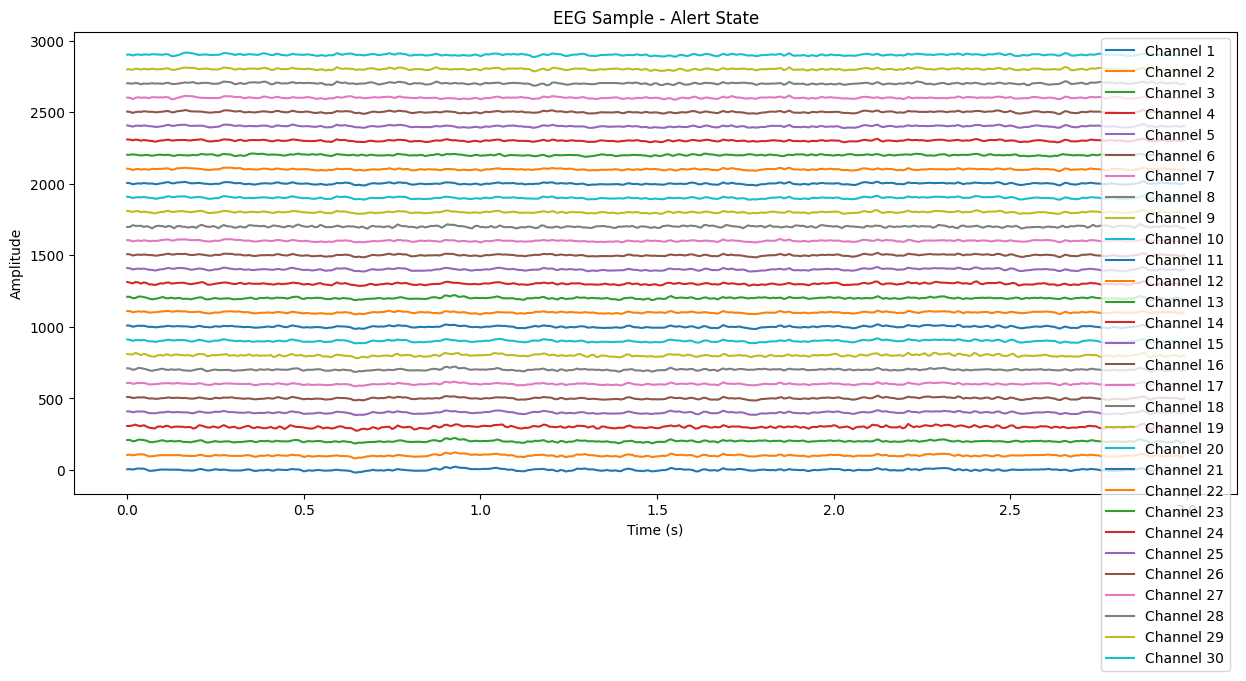

In [16]:
plot_eeg_sample(alert_sample, sample_rate, 'EEG Sample - Alert State')

## Time-domain Drowsy State

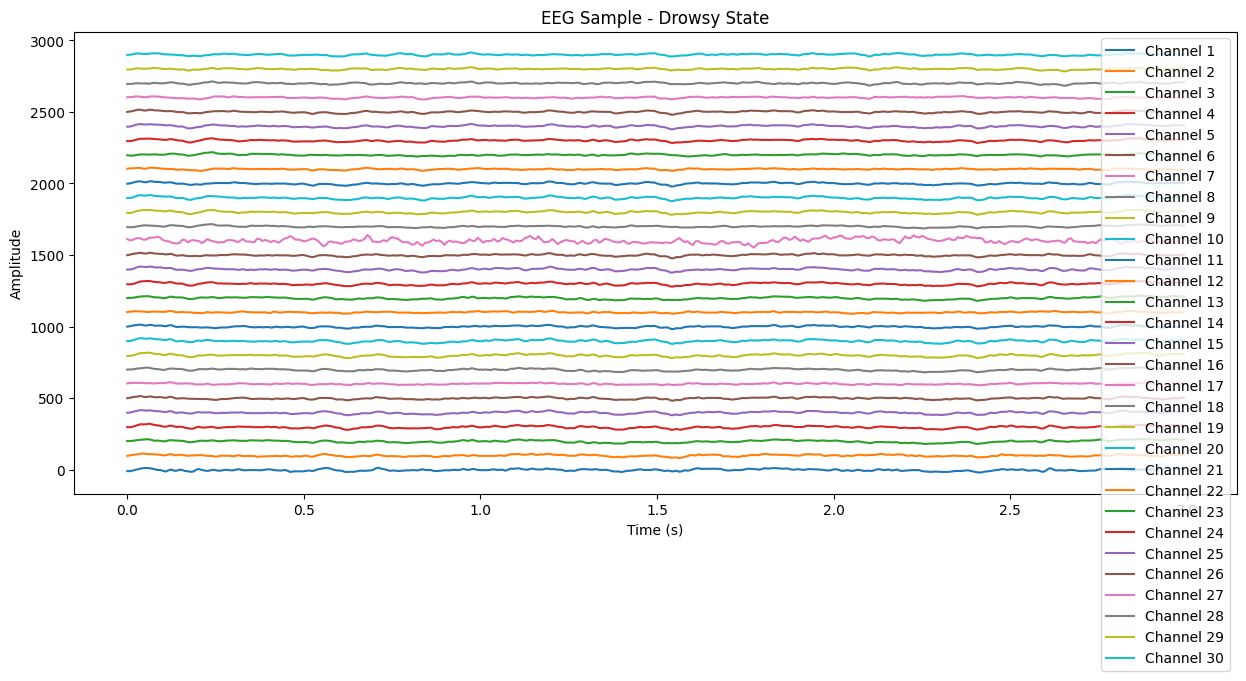

In [17]:
plot_eeg_sample(drowsy_sample, sample_rate, 'EEG Sample - Drowsy State')

In [22]:
import scipy.io

# Load the dataset
file_path = 'EEG driver drowsiness dataset.mat'
data = scipy.io.loadmat(file_path)

# Display the keys and some basic information about the dataset
data.keys(), {key: type(data[key]) for key in data.keys()}

(dict_keys(['__header__', '__version__', '__globals__', 'EEGsample', 'subindex', 'substate']),
 {'__header__': bytes,
  '__version__': str,
  '__globals__': list,
  'EEGsample': numpy.ndarray,
  'subindex': numpy.ndarray,
  'substate': numpy.ndarray})

In [23]:
# Examine the dimensions of the EEGsample, subindex, and substate arrays
eeg_sample_shape = data['EEGsample'].shape
subindex_shape = data['subindex'].shape
substate_shape = data['substate'].shape

eeg_sample_shape, subindex_shape, substate_shape


((2022, 30, 384), (2022, 1), (2022, 1))

In [25]:
import numpy as np

# Extracting the EEG data, subject indices, and states
eeg_data = data['EEGsample']
subject_indices = data['subindex'].flatten()  # Flatten to make it a 1D array
subject_states = data['substate'].flatten()  # Flatten to make it a 1D array

# Basic statistical summaries for the EEG data
# Since the data is 3D, we will compute the mean and standard deviation across all samples and channels
eeg_mean = np.mean(eeg_data)
eeg_std = np.std(eeg_data)

eeg_mean, eeg_std


(-0.032897111658380156, 20.014940463647438)

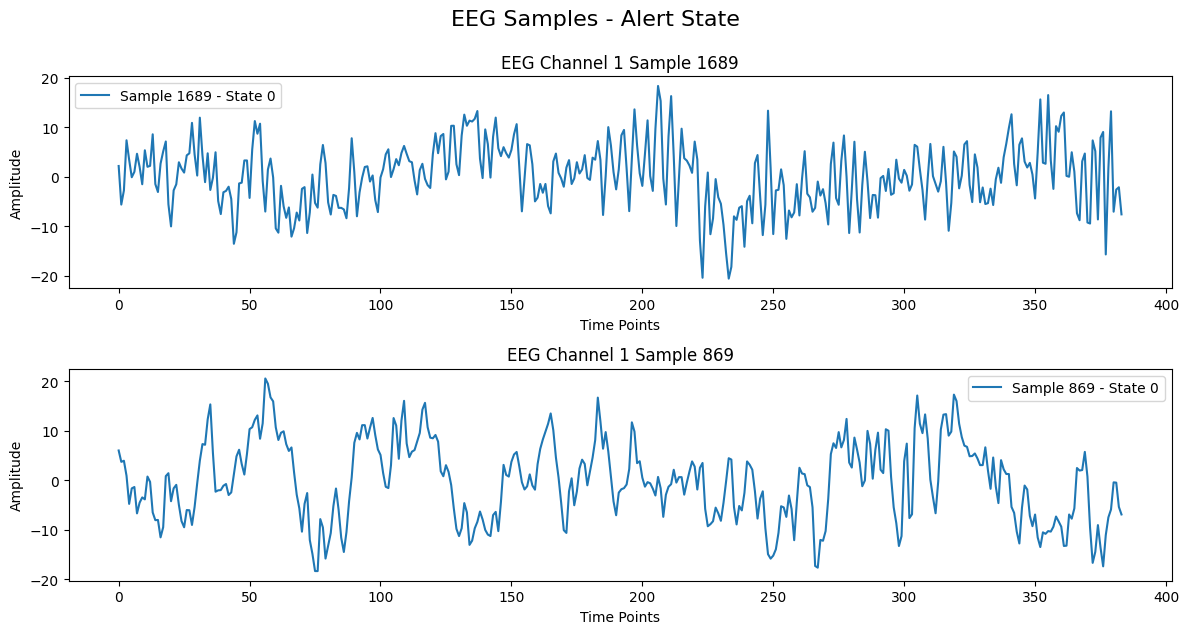

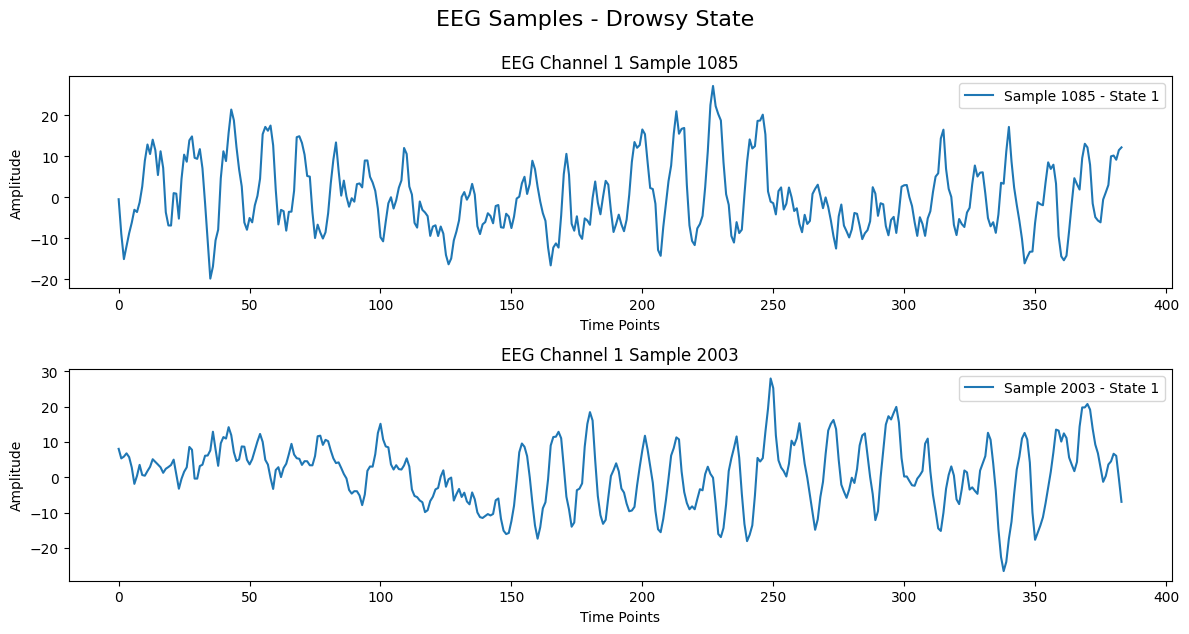

In [26]:
import matplotlib.pyplot as plt

# Function to plot EEG samples
def plot_eeg_samples(eeg_data, subject_states, sample_indices, title):
    fig, axs = plt.subplots(len(sample_indices), 1, figsize=(12, len(sample_indices) * 3))
    if len(sample_indices) == 1:
        axs = [axs]  # To handle single plot scenario

    for i, idx in enumerate(sample_indices):
        axs[i].plot(eeg_data[idx, 0, :], label=f'Sample {idx} - State {subject_states[idx]}')
        axs[i].legend()
        axs[i].set_xlabel('Time Points')
        axs[i].set_ylabel('Amplitude')
        axs[i].set_title(f'EEG Channel 1 Sample {idx}')

    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.05)
    plt.show()

# Select a few random samples from alert and drowsy states
alert_samples = np.random.choice(np.where(subject_states == 0)[0], 2, replace=False)
drowsy_samples = np.random.choice(np.where(subject_states == 1)[0], 2, replace=False)

# Plotting the samples
plot_eeg_samples(eeg_data, subject_states, alert_samples, "EEG Samples - Alert State")
plot_eeg_samples(eeg_data, subject_states, drowsy_samples, "EEG Samples - Drowsy State")


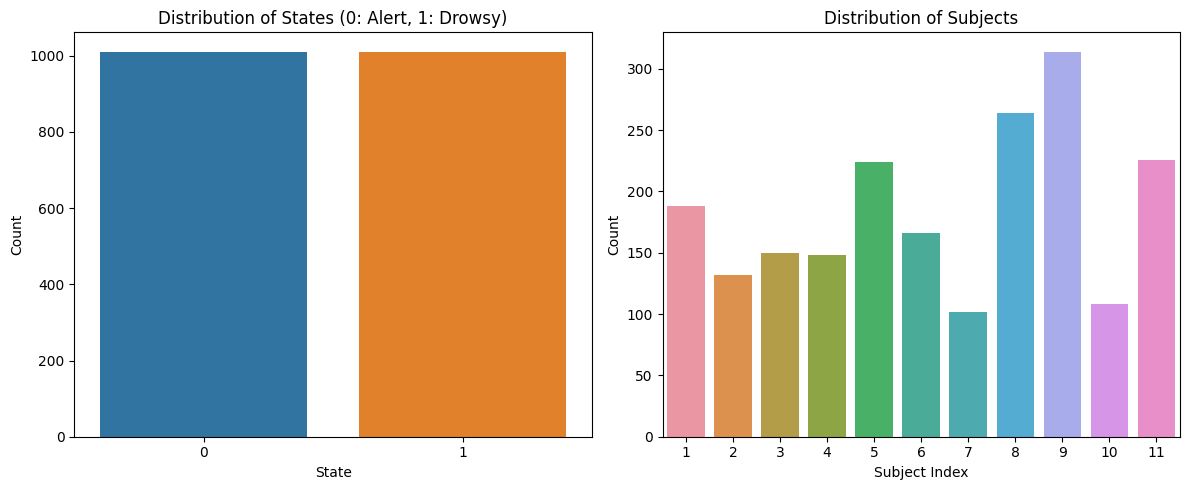

In [27]:
import seaborn as sns

# Distribution of states (alert vs. drowsy)
state_counts = np.unique(subject_states, return_counts=True)

# Distribution of subjects
subject_counts = np.unique(subject_indices, return_counts=True)

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=state_counts[0], y=state_counts[1])
plt.title('Distribution of States (0: Alert, 1: Drowsy)')
plt.xlabel('State')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=subject_counts[0], y=subject_counts[1])
plt.title('Distribution of Subjects')
plt.xlabel('Subject Index')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


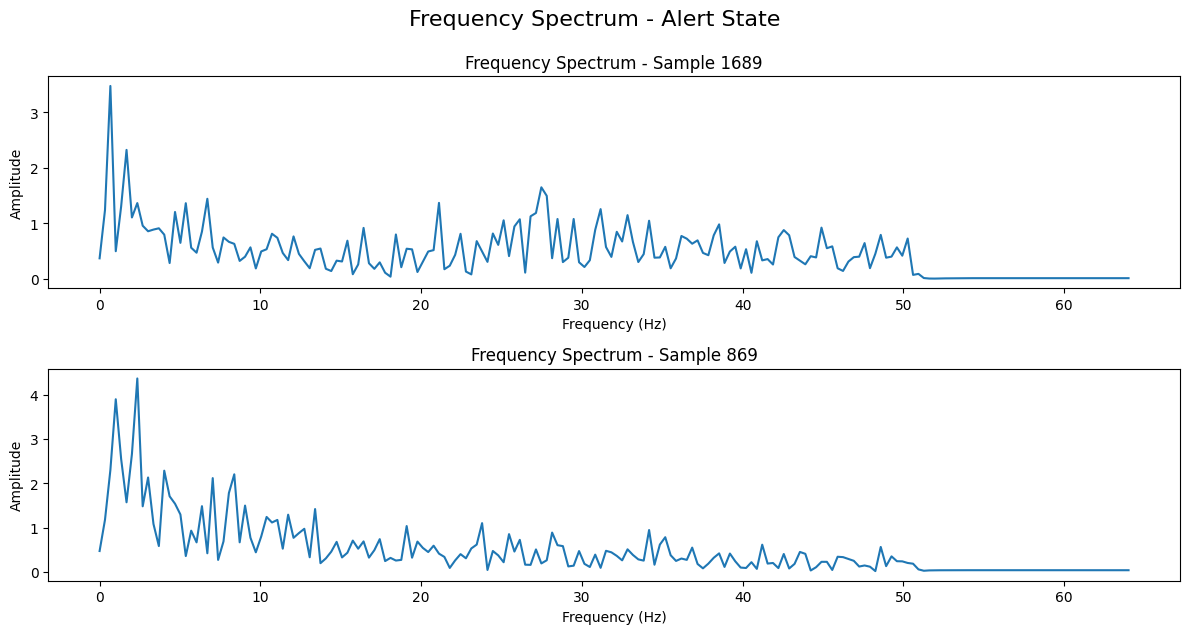

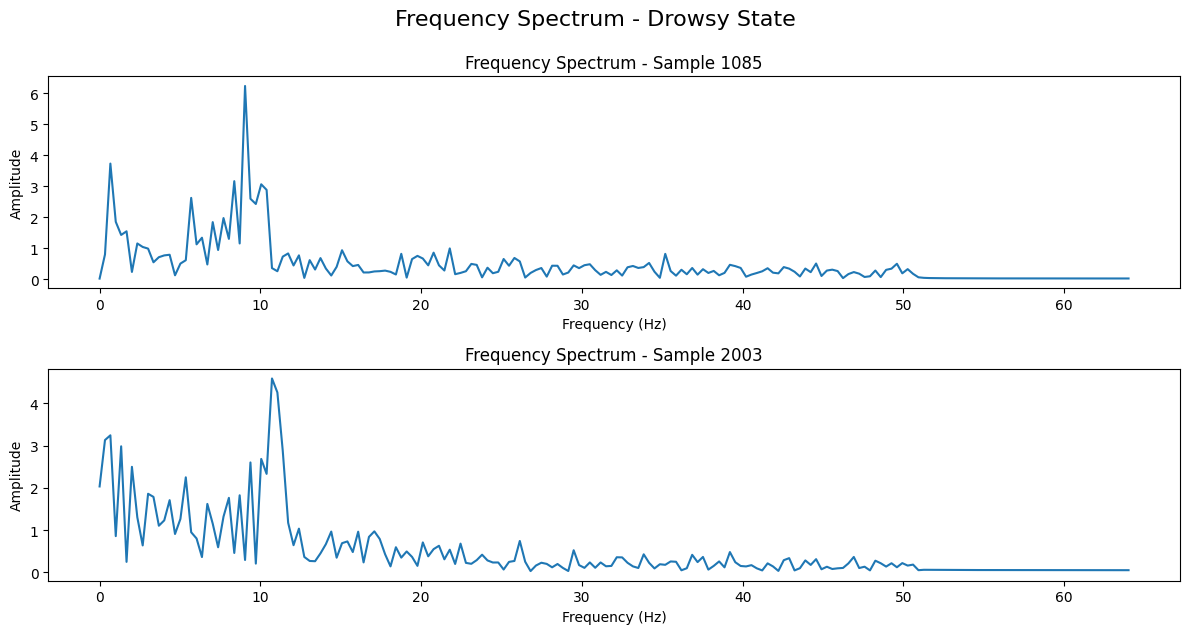

In [28]:
from scipy.fft import fft

# Function to perform FFT and plot the frequency spectrum
def plot_frequency_spectrum(eeg_data, sample_indices, title):
    fig, axs = plt.subplots(len(sample_indices), 1, figsize=(12, len(sample_indices) * 3))
    if len(sample_indices) == 1:
        axs = [axs]  # To handle single plot scenario

    # Assuming a sampling rate of 128 Hz
    sampling_rate = 128
    N = eeg_data.shape[2]  # Number of data points in each sample
    freq = np.linspace(0.0, sampling_rate / 2, N // 2)

    for i, idx in enumerate(sample_indices):
        # FFT and frequency domain representation
        yf = fft(eeg_data[idx, 0, :])
        axs[i].plot(freq, 2.0/N * np.abs(yf[:N//2]))
        axs[i].set_xlabel('Frequency (Hz)')
        axs[i].set_ylabel('Amplitude')
        axs[i].set_title(f'Frequency Spectrum - Sample {idx}')

    plt.tight_layout()
    plt.suptitle(title, fontsize=16, y=1.05)
    plt.show()

# Perform FFT and plot for a few random samples from alert and drowsy states
plot_frequency_spectrum(eeg_data, alert_samples, "Frequency Spectrum - Alert State")
plot_frequency_spectrum(eeg_data, drowsy_samples, "Frequency Spectrum - Drowsy State")


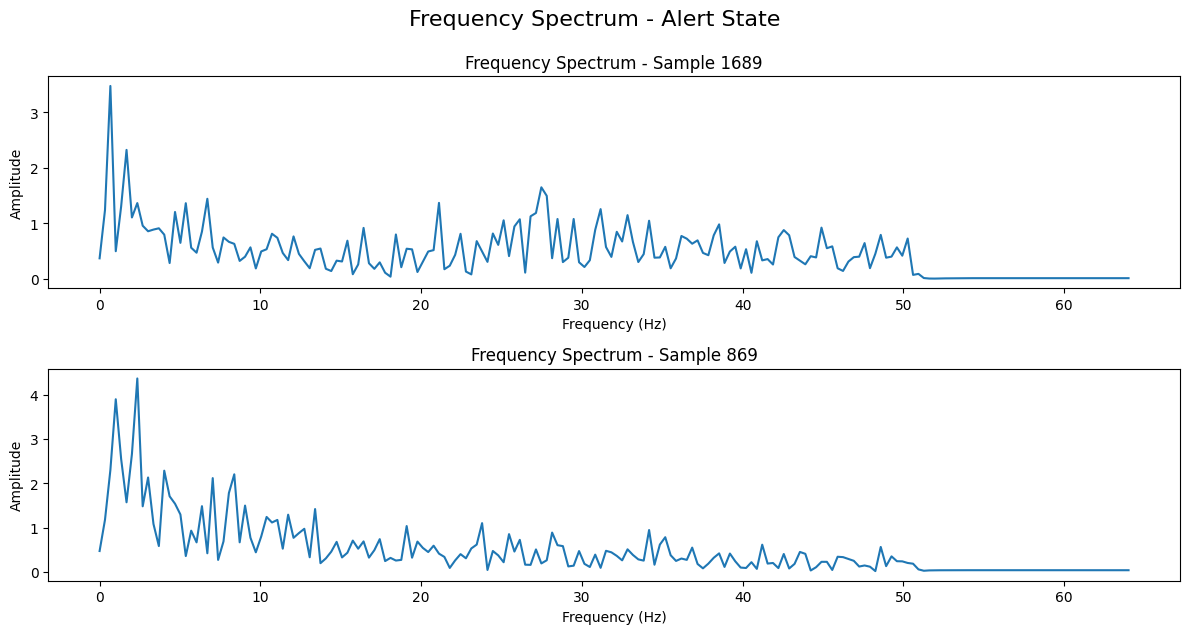

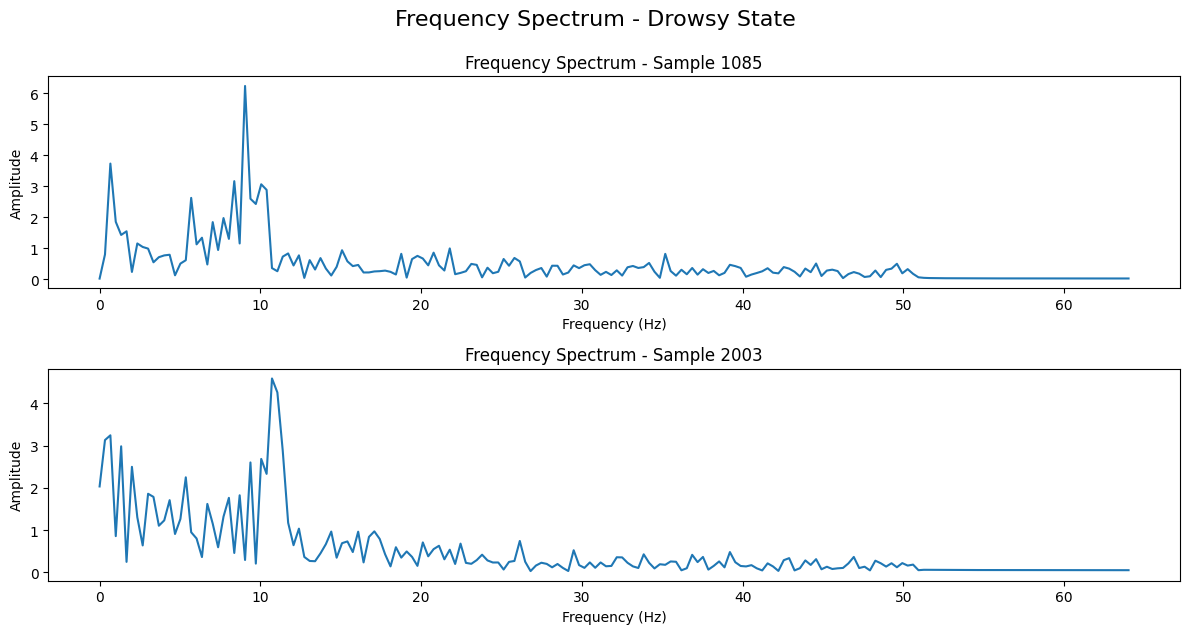

In [29]:
# Re-running the frequency analysis code

# Perform FFT and plot for a few random samples from alert and drowsy states
plot_frequency_spectrum(eeg_data, alert_samples, "Frequency Spectrum - Alert State")
plot_frequency_spectrum(eeg_data, drowsy_samples, "Frequency Spectrum - Drowsy State")


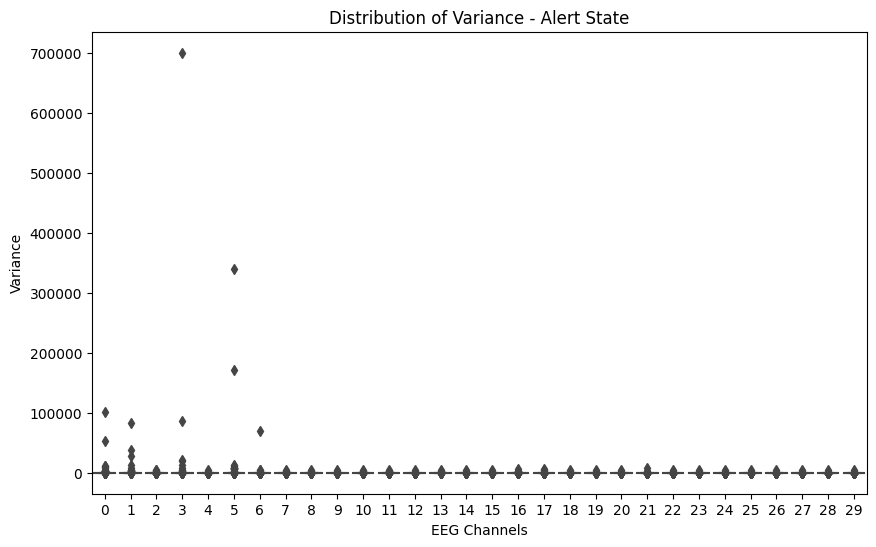

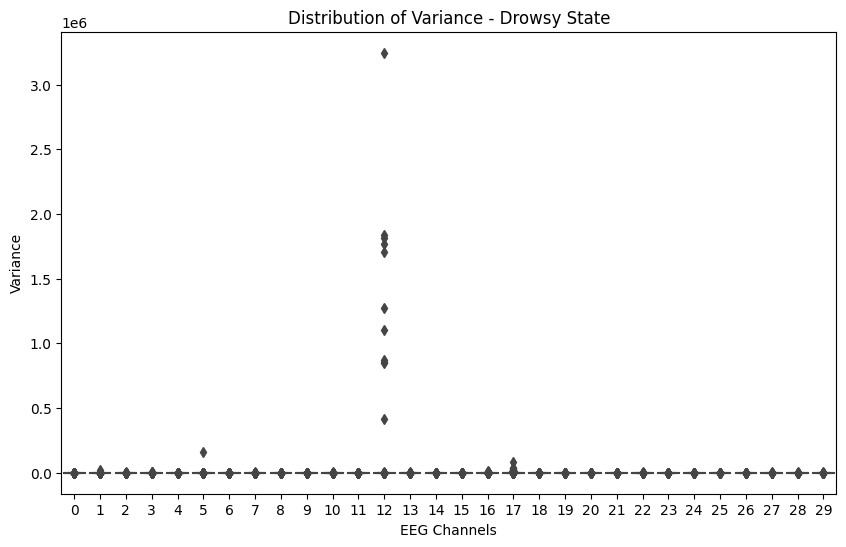

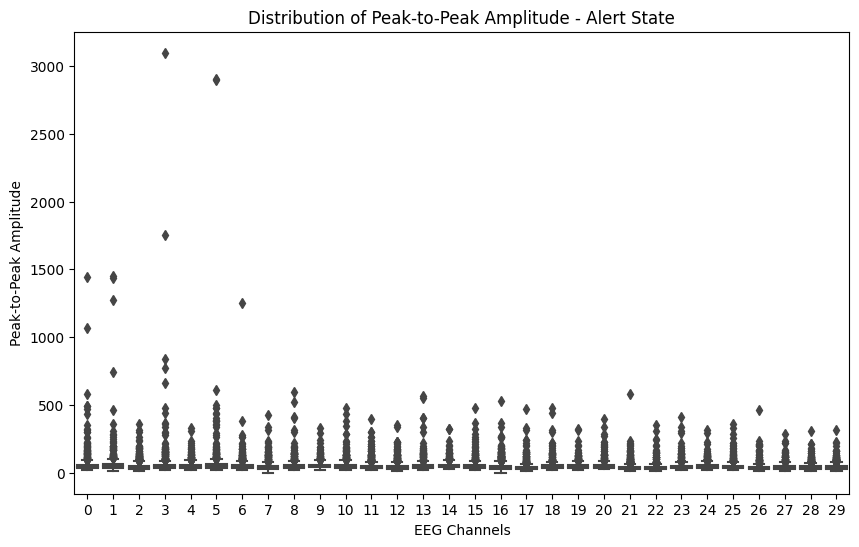

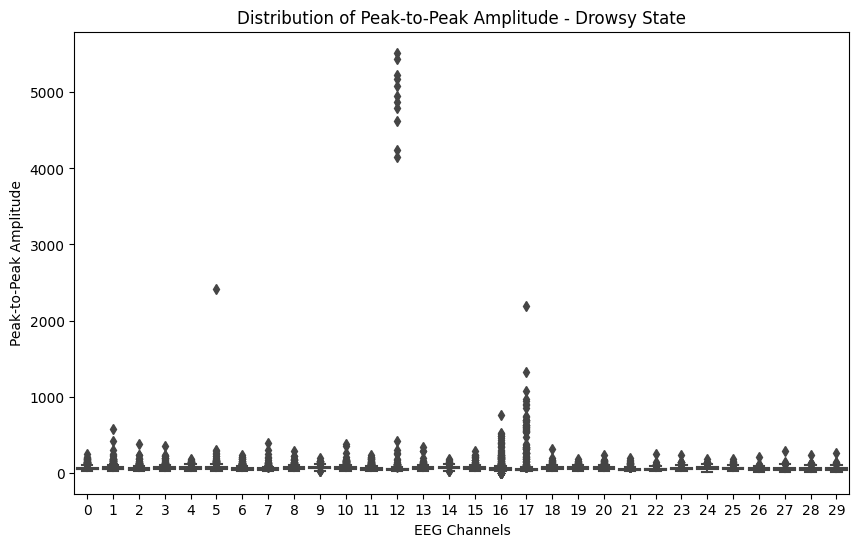

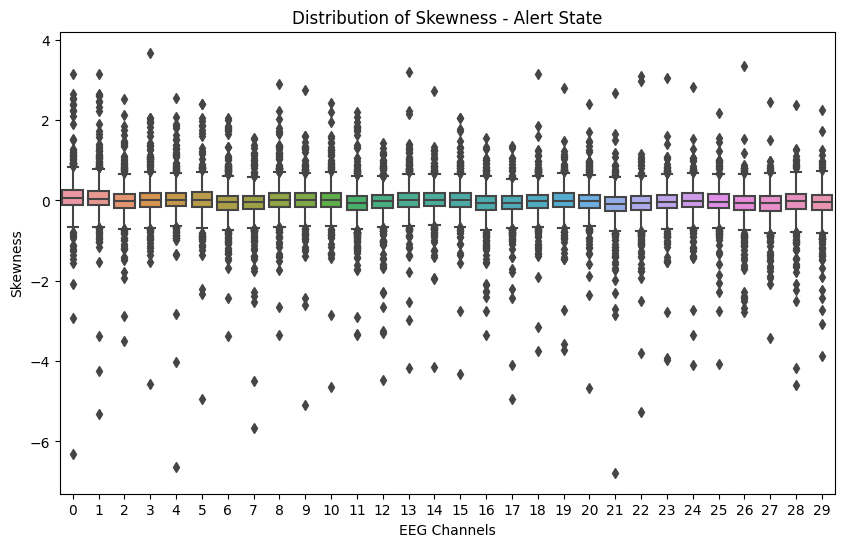

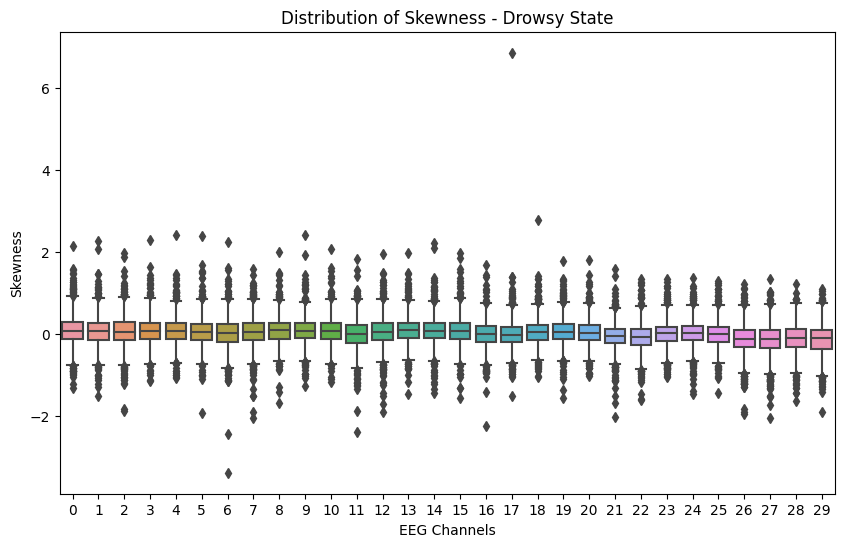

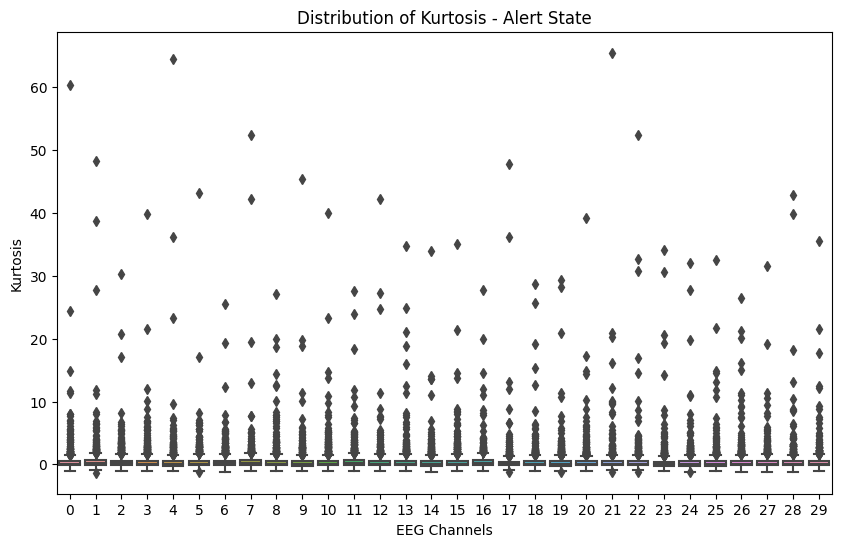

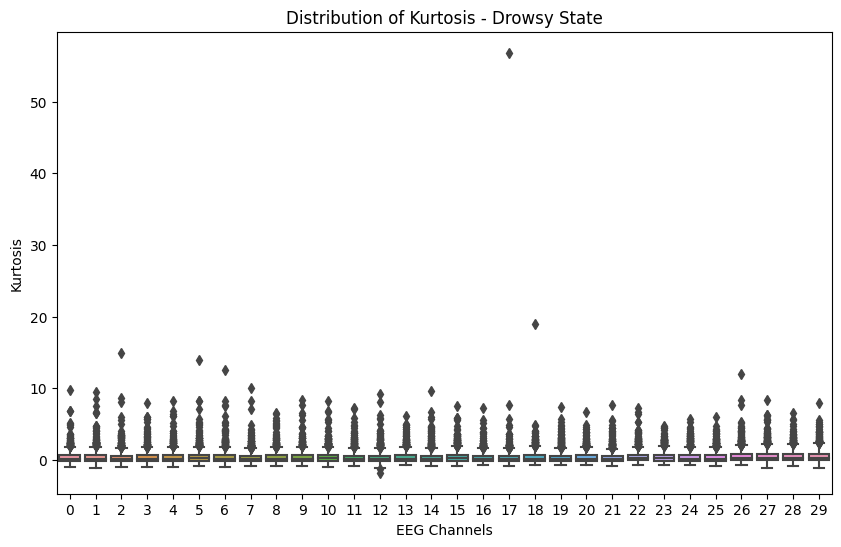

In [30]:
from scipy.stats import skew, kurtosis

# Function to calculate time-domain features for EEG data
def calculate_time_domain_features(eeg_data):
    # Variance
    variance = np.var(eeg_data, axis=2)
    
    # Peak-to-Peak Amplitude
    peak_to_peak = np.ptp(eeg_data, axis=2)
    
    # Skewness
    skewness = skew(eeg_data, axis=2)

    # Kurtosis
    kurt = kurtosis(eeg_data, axis=2)

    return variance, peak_to_peak, skewness, kurt

# Calculating time-domain features
variance, peak_to_peak, skewness, kurtosis_values = calculate_time_domain_features(eeg_data)

# Function to plot feature distributions
def plot_feature_distributions(features, feature_name, state):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=features)
    plt.title(f'Distribution of {feature_name} - {state} State')
    plt.xlabel('EEG Channels')
    plt.ylabel(feature_name)
    plt.show()

# Plotting the distributions for alert and drowsy states
plot_feature_distributions(variance[subject_states == 0], "Variance", "Alert")
plot_feature_distributions(variance[subject_states == 1], "Variance", "Drowsy")

plot_feature_distributions(peak_to_peak[subject_states == 0], "Peak-to-Peak Amplitude", "Alert")
plot_feature_distributions(peak_to_peak[subject_states == 1], "Peak-to-Peak Amplitude", "Drowsy")

plot_feature_distributions(skewness[subject_states == 0], "Skewness", "Alert")
plot_feature_distributions(skewness[subject_states == 1], "Skewness", "Drowsy")

plot_feature_distributions(kurtosis_values[subject_states == 0], "Kurtosis", "Alert")
plot_feature_distributions(kurtosis_values[subject_states == 1], "Kurtosis", "Drowsy")


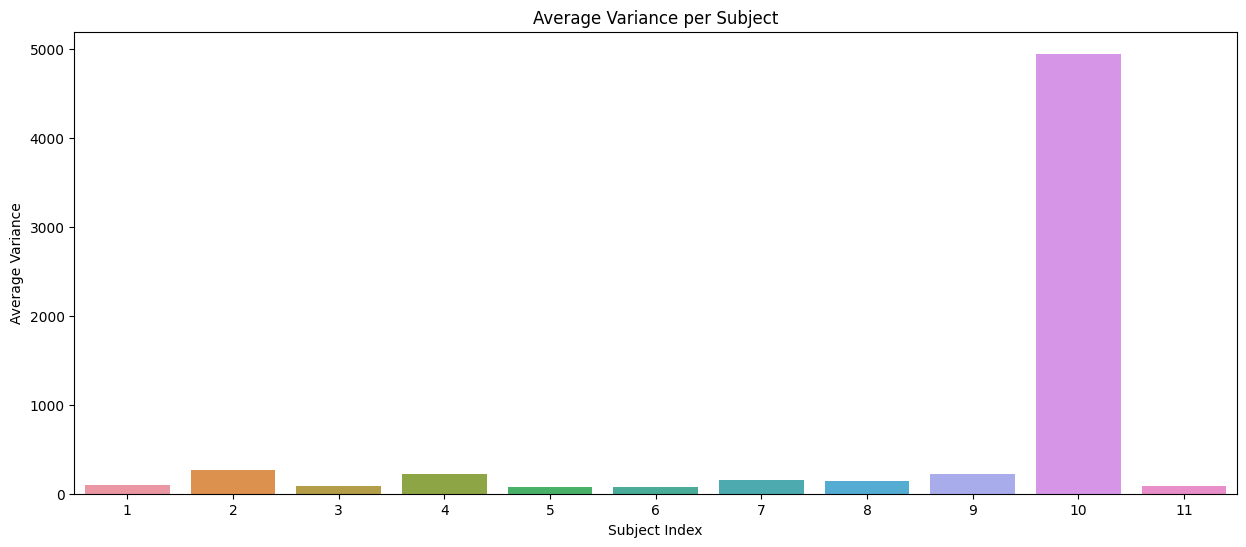

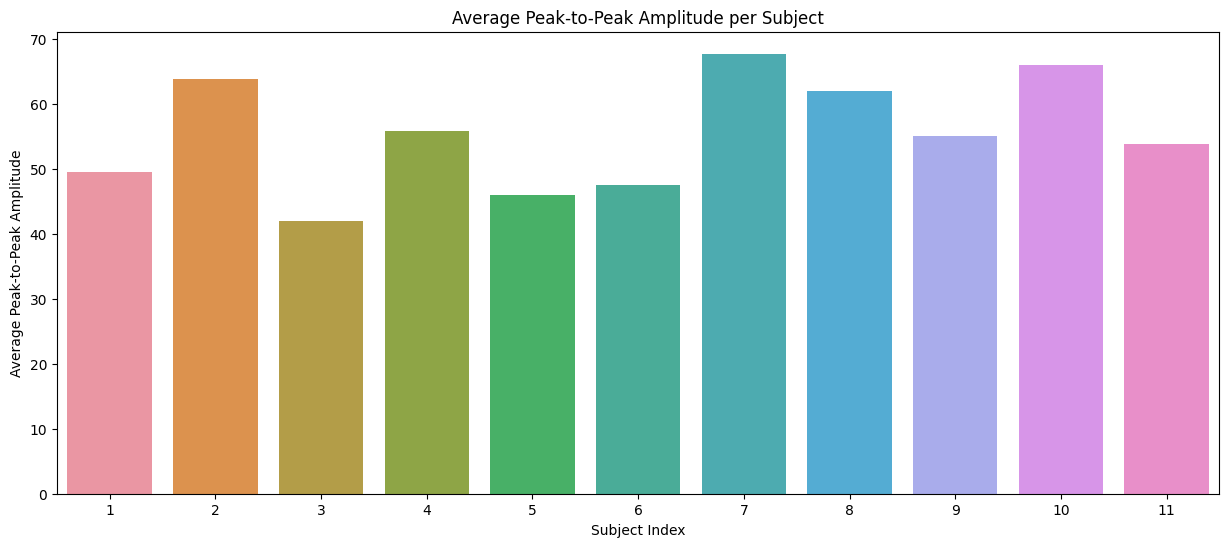

In [32]:
# Aggregating features for each subject
def aggregate_features_per_subject(features, subject_indices):
    unique_subjects = np.unique(subject_indices)
    aggregated_features = np.array([np.mean(features[subject_indices == subject]) for subject in unique_subjects])
    return unique_subjects, aggregated_features

# Aggregating variance and peak-to-peak amplitude for each subject
unique_subjects, aggregated_variance = aggregate_features_per_subject(variance, subject_indices)
_, aggregated_peak_to_peak = aggregate_features_per_subject(peak_to_peak, subject_indices)

# Plotting the aggregated features per subject
plt.figure(figsize=(15, 6))
sns.barplot(x=unique_subjects, y=aggregated_variance)
plt.title('Average Variance per Subject')
plt.xlabel('Subject Index')
plt.ylabel('Average Variance')
plt.show()

plt.figure(figsize=(15, 6))
sns.barplot(x=unique_subjects, y=aggregated_peak_to_peak)
plt.title('Average Peak-to-Peak Amplitude per Subject')
plt.xlabel('Subject Index')
plt.ylabel('Average Peak-to-Peak Amplitude')
plt.show()



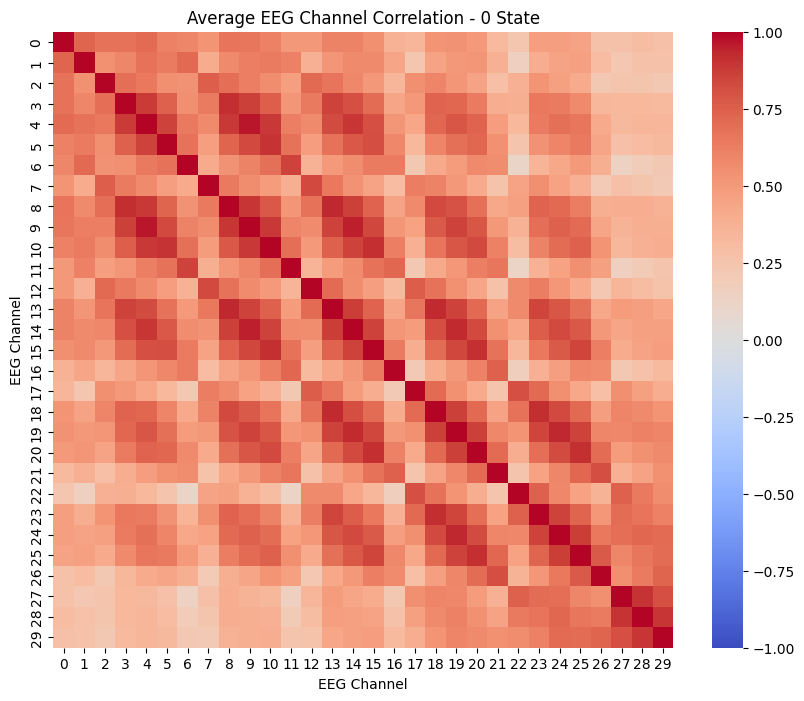

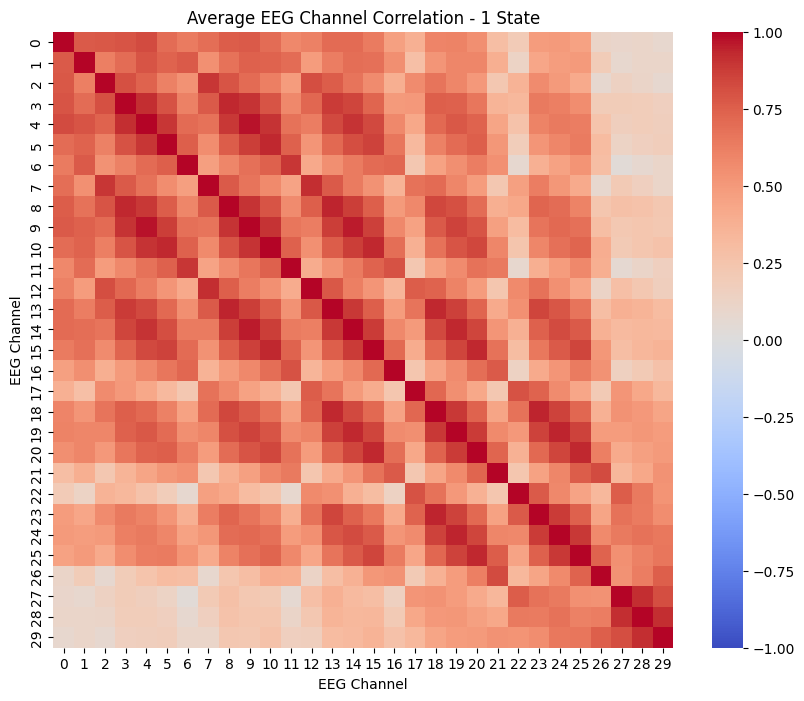

In [33]:
# Function to calculate and plot correlation matrix for EEG channels
def plot_eeg_correlation(eeg_data, subject_states, state_label):
    # Selecting samples corresponding to the specified state
    state_samples = eeg_data[subject_states == state_label, :, :]

    # Average correlation across all samples for this state
    correlations = np.mean([np.corrcoef(sample) for sample in state_samples], axis=0)

    # Plotting
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlations, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Average EEG Channel Correlation - {state_label} State')
    plt.xlabel('EEG Channel')
    plt.ylabel('EEG Channel')
    plt.show()

# Plotting correlation matrix for alert and drowsy states
plot_eeg_correlation(eeg_data, subject_states, 0)  # Alert state
plot_eeg_correlation(eeg_data, subject_states, 1)  # Drowsy state


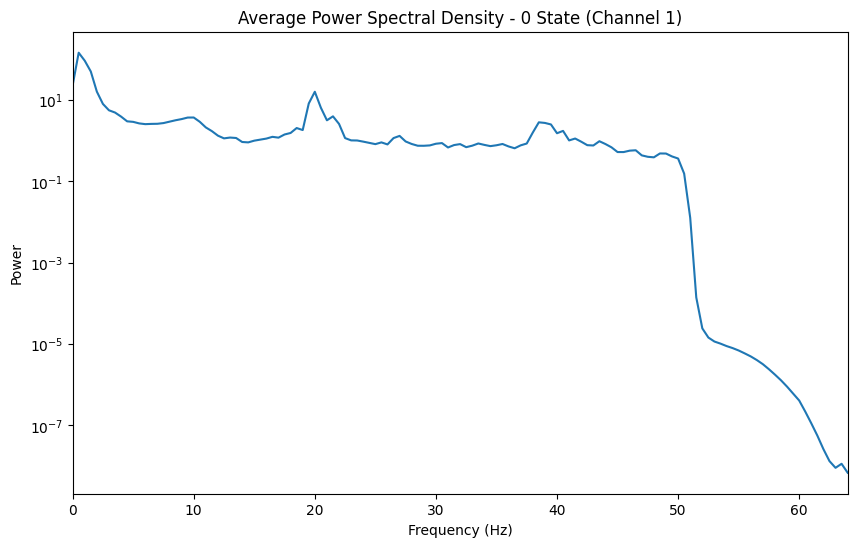

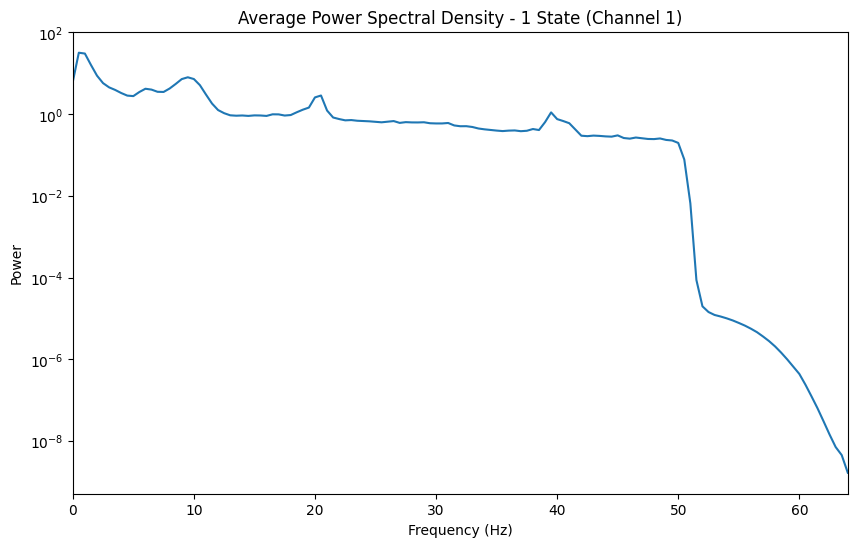

In [35]:
from scipy.signal import welch

# Function to plot Power Spectral Density (PSD) for EEG data
def plot_psd(eeg_data, subject_states, state_label, channel=0):
    # Selecting samples corresponding to the specified state
    state_samples = eeg_data[subject_states == state_label, channel, :]

    # Frequency range for PSD
    f_range = (0, 64)  # Typical range of interest in EEG analysis

    # Calculate PSD using Welch's method
    frequencies, power = welch(state_samples, fs=128, nperseg=256, axis=1)
    mean_power = np.mean(power, axis=0)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.semilogy(frequencies, mean_power)
    plt.xlim(f_range)
    plt.title(f'Average Power Spectral Density - {state_label} State (Channel {channel + 1})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Power')
    plt.show()

# Plotting PSD for a single channel for alert and drowsy states
plot_psd(eeg_data, subject_states, 0)  # Alert state
plot_psd(eeg_data, subject_states, 1)  # Drowsy state


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Feature extraction: combining time-domain and frequency-domain features
# For simplicity, let's use variance and peak-to-peak amplitude as time-domain features
# For frequency-domain features, let's use average power in specific bands (delta, theta, alpha, beta)

# Frequency bands: Delta (0.5-4 Hz), Theta (4-8 Hz), Alpha (8-13 Hz), Beta (13-30 Hz)
def extract_frequency_band_power(eeg_sample, fs=128):
    freq, power = welch(eeg_sample, fs, nperseg=256, axis=1)
    bands = {'delta': (0.5, 4), 'theta': (4, 8), 'alpha': (8, 13), 'beta': (13, 30)}
    band_powers = {}
    for band, (fmin, fmax) in bands.items():
        band_powers[band] = np.mean(power[:, (freq >= fmin) & (freq <= fmax)], axis=1)
    return np.array(list(band_powers.values()))

# Feature extraction for each sample
features = []
for sample in range(eeg_data.shape[0]):
    # Time-domain features
    var = np.var(eeg_data[sample], axis=1)
    ptp = np.ptp(eeg_data[sample], axis=1)

    # Frequency-domain features
    freq_features = extract_frequency_band_power(eeg_data[sample])

    # Combine features
    sample_features = np.concatenate([var, ptp, freq_features.flatten()])
    features.append(sample_features)

features = np.array(features)

# Scaling features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, subject_states, test_size=0.3, random_state=42)

# Building a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluating the model
y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

report


'              precision    recall  f1-score   support\n\n           0       0.80      0.87      0.84       280\n           1       0.88      0.82      0.85       327\n\n    accuracy                           0.84       607\n   macro avg       0.84      0.84      0.84       607\nweighted avg       0.84      0.84      0.84       607\n'

In [37]:
from sklearn.model_selection import GroupShuffleSplit
from sklearn.metrics import accuracy_score

# Creating a group splitter to separate training and testing sets by subjects
group_splitter = GroupShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Splitting the dataset by subjects
for train_idx, test_idx in group_splitter.split(features_scaled, subject_states, subject_indices):
    X_train, X_test = features_scaled[train_idx], features_scaled[test_idx]
    y_train, y_test = subject_states[train_idx], subject_states[test_idx]

# Training the Random Forest Classifier on a subset of subjects
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluating the model on unseen subjects
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

accuracy


0.7209302325581395